# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

### Derivative of Sigmoid Function  

$\displaystyle  \frac{ d }{ dx } \sigma ( x ) = \sigma ( x ) \cdot ( 1 - \sigma ( x ) ) $  
  
Reference : https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e

In [1]:
import numpy as np


# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin( x, deriv = False ) :
    if( deriv == True ) :
        return x*( 1 - x )               # deriv 為 True 時，得到 sigmod 函數的導數
    return 1/( 1 + np.exp( -x ) )


'''
Input Dataset
輸入資料集初始化為 numpy 中的矩陣。
每個 row 為一個“訓練實例”，每個 column 對應著一個輸入節點。

表示我們的神經網路有 4 個訓練實例、3 個輸入節點( 或 features )。
'''
X = np.array( [  [ 0, 0, 1 ],
                      [ 0, 1, 1 ],
                      [ 1, 0, 1 ],
                      [ 1, 1, 1 ] ] )  
        

'''
Output Datase y 為一個 4 x 1 向量
'''
y = np.array( [ [ 0, 0, 1, 1 ] ] ).T

In [2]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed( 1 )
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 

#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）
# initialize weights randomly with mean 0
syn0 = 2 * np.random.random( ( 3, 4 ) ) - 1   # 輸入層與第一個隱藏層間的權重( 3 x 4 )初始化
syn1 = 2 * np.random.random( ( 4, 1 ) ) - 1    # 第一與第二個隱藏層間的權重( 4 x 1 )初始化

syn0_history = [ syn0 ]
syn1_history = [syn1]

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [3]:
iter = 0
for iter in range( 10000 ) :
    # forward propagation
    input_layer = X
    hidden_1 = nonlin( np.dot( input_layer, syn0 ) )   # output of hidden_1
    hidden_2 = nonlin( np.dot( hidden_1, syn1 ) )      # output of hidden_2
    
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
    # how much did we miss?
    hidden_2_error = y - hidden_2
    
    # back propagation
    hidden_2_delta = hidden_2_error * nonlin( hidden_2, True )
    hidden_1_error = np.dot( hidden_2_delta, syn1.T )
    hidden_1_delta = hidden_1_error * nonlin( hidden_1, True ) 

    # update weights
    syn0 += np.dot( input_layer.T, hidden_1_delta )
    syn1 += np.dot( hidden_1_delta.T, hidden_2_delta )

print( "Hidden Layer 2 Output : " )
print( hidden_2 )

Hidden Layer 2 Output : 
[[0.06261002]
 [0.06035201]
 [0.90249854]
 [0.90152592]]
Hidden Layer 2 Output : 
[[0.06261002]
 [0.06035201]
 [0.90249854]
 [0.90152592]]


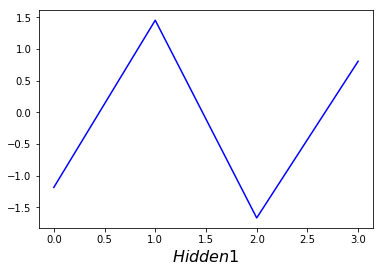

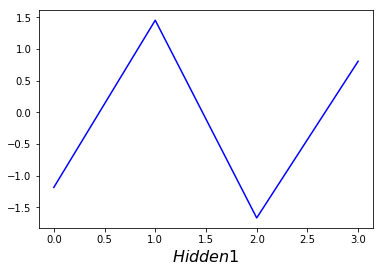

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot( syn1_history[0], ms = 3, lw = 1.5, color = 'blue' )
plt.xlabel( r'$Hidden 1$', fontsize = 16 )
plt.show()